<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Supervised Machine Learning</h1><h2>Assignment</h2><h3>The Data School</h3></th>
    </tr>
</table>

# Name : Joseph Hencil Peter
# NRIC : S7967093F
# Description : Supervised Machine Learning Algoirthm - Assignment

## Objectives
##### After completing this assignment, you should be able to independently:
1. Build Supervised Machine Learning Models to solve classification and regression problems
2. Select, Train and Evaluate the models
3. Fine-tuning model hyperparameters using grid search or other suitable methods
4. Use the model to make predictions

## Problem Statement

### 1. Classification Problem: Bank Customer Churn Prediction
The customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves a company. The studies showed acquiring new customers can cost five times more than satisfying and retaining existing customers. Therefore, it is important to track and retain the existing customers to save the marketing costs. 

The first problem assigned to you is to predict whether the bank's customers will leave the bank or not based on the customers personal information and past history with the bank. Please refer to the files `bank_churn.csv` and `data_dictionary.xlsx` for more information.


### 2. Regression Problem: House Price Prediction
The second problem assigned to you is to predict the house price in Washington based on the house condition, location and other relevant information. Please refer to the files `house_price.csv` and `data_dictionary.xlsx` for more information.

## Dataset

You will need the following files for this assignment:
1. bank_churn.csv
2. house_price.csv
3. data_dictionary.xlsx

In [1]:
# import the python libraries 
# numpy and pandas libraries
import numpy as np
import pandas as pd

#visualization 
import matplotlib.pyplot as plt
%matplotlib inline

#data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML Algorithms (supervised learning)
from sklearn import neighbors, tree, svm, ensemble
import xgboost
from sklearn.model_selection import GridSearchCV

#Model evaluation 
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

#save the model
import joblib

## Instructions
Based on what you have learnt in the course, 
1. Build the supervised machine learning models for the assigned problems 
2. Select, Train and Evaluate the models
3. Shortist a few (two to five) promissing models and fine-tuning model hyperparameters
4. Compare the shortlisted models and recommend the best model 
5. Use the best model to make prediction on the test data
5. Save the model as a "pickle" file for future deployment

The template below has been provided to guide you in the training of your Supervised Machine Learning models. Feel free to **add in more cells** and include more steps where necessary to achieve the goal of the assignment.

## 1. Classification Problem: Bank Customer Churn Prediction

Selected Classification Approaches 
---------------------------------------------------
1. Support Vector Machine(SVM) /GridSearchCV 
2. K-Nearest Neighbors  (KNN) /GridSearchCV 
3. Decision Tree /Bagging Classifier  
4. Random Forest Classifier
5. Boosting Classifier 

### Step 1: Import Data and Perform Data Preparation
Remember to split data into train data and test data

In [2]:
# Enter your code here:

#load the dataset 
bankDatasetOriginal = pd.read_csv("bank_churn.csv")
bankDatasetOriginal.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Customer Id and Surname columns are not required for training (as it will not contribute model accuracy). 
# So remove these two columns 
bankDataset = bankDatasetOriginal.drop(["CustomerId", "Surname"], axis=1)
bankDataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#target variable
bankDataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fining the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [5]:
# Encode the categorical data into numbers
bank_cat = bankDataset.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bankDataset[col]=codes
    print(uniques)
print(bankDataset.head())

Geography :
Index(['France', 'Germany', 'Spain'], dtype='object')
Gender :
Index(['Female', 'Male'], dtype='object')
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [6]:
#Extract features and target variable
X = bankDataset.drop("Exited", axis=1)
y = bankDataset["Exited"]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
#split the data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [10]:
#scaling the data into smaller range. i.e between -3 and 3.  (z-score approach)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [11]:
#general functions
#draw the chart and show the accuracy for training and test data
def drawTrainingAndTestingAccuracyChart(x_range, train_accuracy, test_accuracy, chartTitle, xLabel, yLabel):
    #Plot the train & test accuracy
    plt.plot(x_range, train_accuracy, 'bo-', label ='Training Accuracy')
    plt.plot(x_range, test_accuracy, 'yo-', label = 'Testing Accuracy')

    plt.xlabel(xLabel, fontsize='x-large')
    plt.ylabel(yLabel, fontsize='x-large')

    plt.legend(loc='best', shadow=True, fontsize='x-large')
    plt.title(chartTitle)
    plt.show()

### Classification Model 1- SVM algorithm with polynomial kernal /GridSearchCV Approach

In [12]:
# Model 1
# Enter your code here:
svm_clf = svm.SVC(kernel="poly")

param_grid = {"degree" : range(0,6, 1),  # degree 0,1,2,3,4,5,6
              "coef0" : [0,1], #coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomials
              'C' : [ 0.01, 0.1, 1, 10]}

#GridSearch approach used to select the best hyperparameters. 
# cv: No of partitions for Cross Validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors.
gs_svm_clf = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 7, n_jobs=-1)


gs_svm_clf.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'coef0': [0, 1],
                         'degree': range(0, 6)},
             scoring='accuracy')

In [13]:
print(gs_svm_clf.best_score_)
print(gs_svm_clf.best_params_)
print(gs_svm_clf.best_estimator_)

0.8556245486827283
{'C': 10, 'coef0': 1, 'degree': 3}
SVC(C=10, coef0=1, kernel='poly')


In [14]:
#calculate training and testing accuracy for different degrees
degree_range = range(0, 10,1)
train_accuracy = []
test_accuracy = []

for d in degree_range:
    svm_clf = svm.SVC(kernel="poly", C=10, degree =d, coef0=1)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))

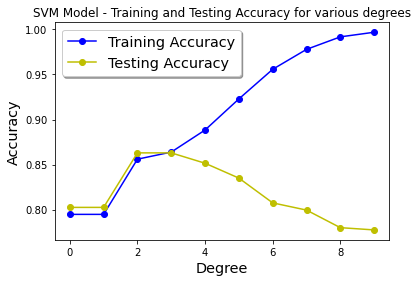

In [15]:
#draw the chart for range of degrees
drawTrainingAndTestingAccuracyChart(degree_range,train_accuracy,  test_accuracy, 'SVM Model - Training and Testing Accuracy for various degrees', 'Degree', 'Accuracy')

In [16]:
svm_clf_best = gs_svm_clf.best_estimator_

#training accuracy using best SVM Model
svm_train_acc = svm_clf_best.score(X_train, y_train)
print('SVM Training Accuracy : ', svm_train_acc)

#testing accuracy using best SVM Model
svm_test_acc = svm_clf_best.score(X_test, y_test)
print('SVM Testing Accuracy : ', svm_test_acc)

print('Selected hypterparameters :  ', gs_svm_clf.best_params_)

SVM Training Accuracy :  0.863875
SVM Testing Accuracy :  0.863
Selected hypterparameters :   {'C': 10, 'coef0': 1, 'degree': 3}


### Classification Model 2 - K-Nearest Neighbors (KNN) /GridSearchCV Approach

In [17]:
# Enter your code here:
knn_clf = neighbors.KNeighborsClassifier()

#define parameters
param_grid = {'n_neighbors' : [3,5,7,9,15, 25], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['euclidean','manhattan'] }


#GridSearch approach used to select the best hyperparameters. 
# cv: No of partitions for Cross Validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors.
gs_knn_clf = GridSearchCV(knn_clf, param_grid=param_grid, scoring='accuracy', cv= 7, n_jobs=-1)


gs_knn_clf.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 15, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
print(gs_knn_clf.best_score_)
print(gs_knn_clf.best_params_)
print(gs_knn_clf.best_estimator_)

0.8371250003556909
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')


In [19]:
#calculate training and testing accuracy for different neighbour range
neighbor_range = range(9, 21, 2)
train_accuracy = []
test_accuracy = []

for n in neighbor_range:
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance', metric= 'manhattan')
    knn_clf.fit(X_train, y_train) 
    train_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))

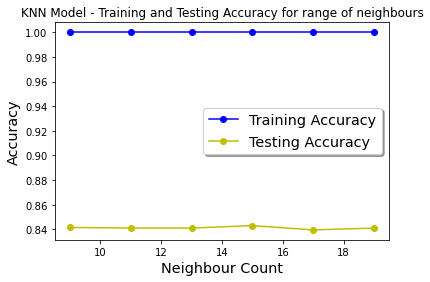

In [20]:
drawTrainingAndTestingAccuracyChart(neighbor_range,train_accuracy,  test_accuracy, 'KNN Model - Training and Testing Accuracy for range of neighbours', 'Neighbour Count', 'Accuracy')

In [21]:
knn_clf_best = gs_knn_clf.best_estimator_

#training accuracy using best SVM Model
knn_train_acc = knn_clf_best.score(X_train, y_train)
print('KNN Training Accuracy : ', knn_train_acc)

#testing accuracy using best SVM Model
knn_test_acc = knn_clf_best.score(X_test, y_test)
print('KNN Testing Accuracy : ', knn_test_acc)

print('Selected hypterparameters :  ', gs_knn_clf.best_params_)

KNN Training Accuracy :  1.0
KNN Testing Accuracy :  0.843
Selected hypterparameters :   {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


### Classification Model 3 - Decision Tree /Bagging Classifier

In [22]:
# Model 3 (optional)
# Enter your code here:
dTree_clf = tree.DecisionTreeClassifier()
bag_tree_clf = ensemble.BaggingClassifier(
    dTree_clf,
    n_estimators = 100, #number of estimator can be used
    max_samples = 350, # no of samples for each training 
    bootstrap=True, #  bootstrap sampling enabled.
    n_jobs=-1) # use all cores 


bag_tree_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=350,
                  n_estimators=100, n_jobs=-1)

In [23]:
print(' Decision Tree /Bagging Classifier Training Accuracy:', bag_tree_clf.score(X_train, y_train))

print(' Decision Tree /Bagging Classifier Training Accuracy:', bag_tree_clf.score(X_test, y_test))

 Decision Tree /Bagging Classifier Training Accuracy: 0.861625
 Decision Tree /Bagging Classifier Training Accuracy: 0.861


### Classification Model 4 - Random Forest Classifier

In [24]:
# Model 4 (optional)
# Enter your code here:
#Random Forest Classifier

depth_range = range(1,25)
train_accuracy = []
test_accuracy = []

for d in depth_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =30, 
                                             criterion ='gini', 
                                             max_depth = d, 
                                             max_features = 4)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
    

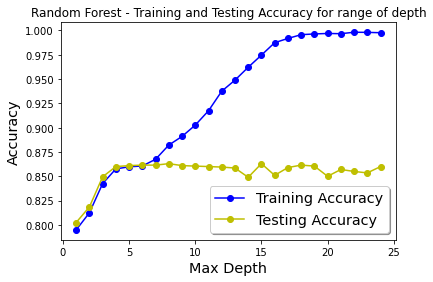

In [25]:
drawTrainingAndTestingAccuracyChart(depth_range,train_accuracy,  test_accuracy, 'Random Forest - Training and Testing Accuracy for range of depth', 'Max Depth', 'Accuracy')

In [26]:
#Depth which has best accuracy
1+ np.argmax(test_accuracy)

8

In [27]:
#n_estimators
n_range = range(10, 100, 10) 
train_accuracy = []
test_accuracy = []

for n in n_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =n, 
                                             criterion ='gini', 
                                             max_depth = 8,  #max depth 8 has chosten based on the previous expreiment.
                                             max_features =10)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))

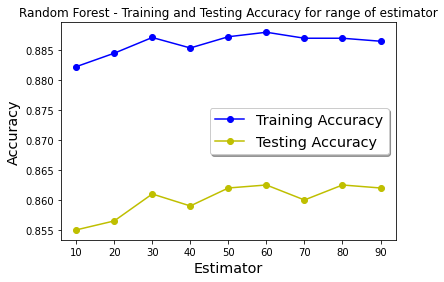

In [28]:
#draw the chart - accuracy vs estimators
drawTrainingAndTestingAccuracyChart(n_range, train_accuracy,  test_accuracy, 'Random Forest - Training and Testing Accuracy for range of estimator', 'Estimator', 'Accuracy')

In [29]:
#Estimator which has best accuracy (add starting value)
10 + np.argmax(test_accuracy)

15

In [30]:
#max_features
f_range = range(2,10)
train_accuracy = []
test_accuracy = []

for f in f_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =15, #n_estimators 15 has chosten based on the previous expreiment.
                                             criterion ='gini', 
                                             max_depth = 8, #max depth 8 has chosten based on the previous expreiment.
                                             max_features =f)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))

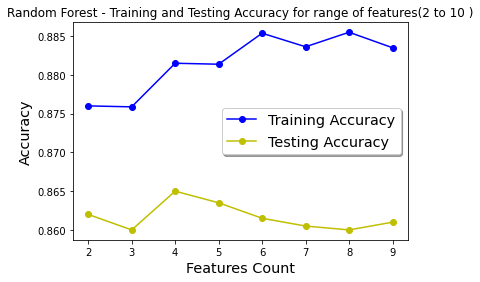

In [31]:
#draw the chart - accuracy vs estimators
drawTrainingAndTestingAccuracyChart(f_range, train_accuracy,  test_accuracy, 'Random Forest - Training and Testing Accuracy for range of features(2 to 10 )', 'Features Count', 'Accuracy')

In [32]:
#features count which has best accuracy (add starting value)
2 + np.argmax(test_accuracy)

4

In [33]:
#create Random Forest model with selected hypterparameters 
rf_clf_best = ensemble.RandomForestClassifier(n_estimators =15, #n_estimators 15 has chosten based on the previous expreiment.
                                             criterion ='gini', 
                                             max_depth = 8, #max depth 8 has chosten based on the previous expreiment.
                                             max_features =4)
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=15)

In [34]:
print(' Random Forest Classifier Training Accuracy:', rf_clf_best.score(X_train, y_train))

print(' Random Forest Classifier Training Accuracy:', rf_clf_best.score(X_test, y_test))

print('Selected Parameters', rf_clf_best.get_params)

 Random Forest Classifier Training Accuracy: 0.877625
 Random Forest Classifier Training Accuracy: 0.8585
Selected Parameters <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, max_features=4, n_estimators=15)>


#### Classification Model 5 - Boosting Classifier

In [35]:
# Model 5 (optional)
# Enter your code here:

#Extreme gradient boosting classifier 

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
print('Extreme Gradient Boosting Classifier Training Accuracy:', xgb_clf.score(X_train, y_train))

print('Extreme Gradient Boosting Training Accuracy:', xgb_clf.score(X_test, y_test))
print('Selected Parameters', xgb_clf.get_params)

Extreme Gradient Boosting Classifier Training Accuracy: 0.950375
Extreme Gradient Boosting Training Accuracy: 0.8555
Selected Parameters <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>


### Compare the models

<AxesSubplot:title={'center':'Train & Test Accuracy for different classification models'}>

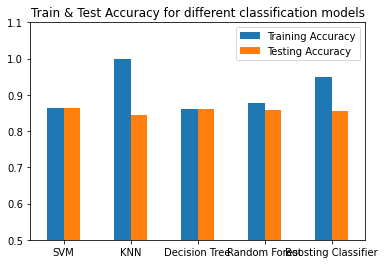

In [37]:

train_acc_arr = [svm_clf_best.score(X_train, y_train),
                 knn_clf_best.score(X_train, y_train), 
                 bag_tree_clf.score(X_train, y_train), 
                 rf_clf_best.score(X_train, y_train), 
                 xgb_clf.score(X_train, y_train)]


test_acc_arr =[svm_clf_best.score(X_test, y_test), 
               knn_clf_best.score(X_test, y_test), 
               bag_tree_clf.score(X_test, y_test), 
               rf_clf_best.score(X_test, y_test), 
               xgb_clf.score(X_test, y_test)]
label =['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Boosting Classifier']

df_acc = pd.DataFrame({'Training Accuracy': train_acc_arr,
                   'Testing Accuracy': test_acc_arr}, index=label)

df_acc.plot.bar(rot=0, ylim=[0.5, 1.1], title ='Train & Test Accuracy for different classification models')



In [38]:
print(label)
print(test_acc_arr)

['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Boosting Classifier']
[0.863, 0.843, 0.861, 0.8585, 0.8555]


### Step 3: Recommend the Best Model and Explain the Reasons

Explain your answer here:



In [39]:
#select the best model using the test accuracy 
# 0 index refers the SVM model 
np.argmax(test_acc_arr)

0

In [40]:
#training accuracy using best SVM Model
svm_train_acc = svm_clf_best.score(X_train, y_train)
print('SVM Training Accuracy : ', svm_train_acc)

#testing accuracy using best SVM Model
svm_test_acc = svm_clf_best.score(X_test, y_test)
print('SVM Testing Accuracy : ', svm_test_acc)

SVM Training Accuracy :  0.863875
SVM Testing Accuracy :  0.863


Recommendation 
===============
#### Upon comparing the performance of five machine learning models ('SVM', 'KNN', 'Decision Tree', 'Random Forest' and 'Boosting Classifier'), SVM classifier gives better performance comparing with other models. 
#### So SVM based model has been selected as a best classifier for the given bank dataset. 


### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. confusion matrix, precision & recall and etc.)


In [41]:
# Enter your code here:

#predict test data
y_pred = svm_clf_best.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
# Confusion Matrix - y test vs y pred
confusion_matrix(y_test, y_pred)

array([[1566,   39],
       [ 235,  160]], dtype=int64)

In [43]:
# Classification Report - y test vs y pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1605
           1       0.80      0.41      0.54       395

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



### Step 5: Save the Best Model for Future Use

In [44]:
# Enter your code here:
joblib.dump(svm_clf_best, "best_classification_model.pkl")


['best_classification_model.pkl']

## 2. Regression Problem: Housing Price Prediction

Selected Regression Approaches 
===========================
1. Support Vector Machine(SVM) /GridSearchCV
2. K-Nearest Neighbours (KNN) /GridSearchCV
3. Decision Tree /Bagging Regressor 
4. Random Forest Regressor
5. Boosting Regressor


### Step 1: Import Data and Perform Data Preparation

In [45]:
# Enter your code here:
houseDatasetOriginal = pd.read_csv("house_price.csv")
houseDatasetOriginal.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
3,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
4,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA


In [46]:
# Country column has only one value "USA". so it will not contribute any accuracy to the model. 
# So remove the country column
houseDataset = houseDatasetOriginal.drop(["country"], axis=1)
houseDataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
2,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
3,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115
4,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052


In [47]:
#divide the date into years, month and day
houseDataset["date"] = pd.to_datetime(houseDataset['date'])
houseDataset["day"] = houseDataset["date"].apply(lambda date:date.day)
houseDataset["month"] = houseDataset["date"].apply(lambda date:date.month)
houseDataset["year"] = houseDataset["date"].apply(lambda date:date.year)
houseDataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,day,month,year
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,2,5,2014
1,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,2,5,2014
2,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2,5,2014
3,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,2,5,2014
4,2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,2,5,2014


In [48]:
#remove the date column as day, month, year are captured in different columns
houseDataset = houseDataset.drop("date", axis=1)
houseDataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,day,month,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,2,5,2014
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,2,5,2014
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2,5,2014
3,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,2,5,2014
4,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,2,5,2014


In [49]:
#Use Random forest to select the best features 
X_Temp = houseDataset.drop("price", axis=1)
y_temp = houseDataset["price"]

X_Temp_cat = X_Temp.select_dtypes(['object']).copy()
for col in X_Temp_cat:
    print(col, ':')
    codes, uniques = pd.factorize(X_Temp_cat[col], sort=True)
    X_Temp[col]=codes
    print(uniques)
print(X_Temp.head())

X_Factorized =  X_Temp.copy()


street :
Index(['1 View Ln NE', '100 24th Ave E', '1000 Mountain View Blvd SE',
       '10000-10026 S 100th St', '10005 16th Ave S', '10009 SE 247th Pl',
       '1001 SW 102nd St', '1001 Whitman Ct NE', '10010 37th Ave SW',
       '10010 44th Ave SW',
       ...
       '9908 S 210th Pl', '9957 Rainier Ave S', '996 SE 12th St',
       'Bennett Ave SE', 'Brooktrails Trail 14', 'Burke-Gilman Trail',
       'Cedar to Green River Trail', 'Evergreen Way SE', 'SE 170th Pl',
       'Tolt Pipeline Trail'],
      dtype='object', length=2466)
city :
Index(['Algona', 'Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien',
       'Carnation', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton',
       'Samma

In [50]:
X_Temp = X_Temp.drop("year", axis = 1)

In [51]:
mean = X_Temp.mean()
std = X_Temp.std()

X_Temp = (X_Temp - mean) / std

In [52]:
                            

param_grid = {"n_estimators" : [10,100,1000] , 
              'max_depth' : [3,9,27]}

rf_reg = ensemble.RandomForestRegressor(n_estimators=1000, max_depth=27)
#rf_reg.fit(X_Temp, y_temp) 

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)

gs_reg.fit(X_Temp, y_temp)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=27, n_estimators=1000),
             n_jobs=-1,
             param_grid={'max_depth': [3, 9, 27],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [53]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-3957780311.9594584
{'max_depth': 27, 'n_estimators': 1000}
RandomForestRegressor(max_depth=27, n_estimators=1000)


In [54]:
rf_reg.fit(X_Temp, y_temp) 

RandomForestRegressor(max_depth=27, n_estimators=1000)

In [55]:
pd.concat((pd.DataFrame(X_Temp.columns, columns = ['feature']), 
           pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
14,statezip,0.180911
13,city,0.164084
2,sqft_living,0.148797
1,bathrooms,0.094659
3,sqft_lot,0.094297
12,street,0.070988
10,yr_built,0.062256
8,sqft_above,0.055432
15,day,0.037629
11,yr_renovated,0.020376


In [56]:
#select all the features where importance value >= 0.05 
X_Selected = X_Factorized[["statezip", "city", "sqft_living", "bathrooms",	"sqft_lot",	"street", "yr_built", "sqft_above"]]

In [57]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_Selected,y_temp, test_size=0.2, random_state=2)

In [58]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [59]:
def drawTrainingAndTestingMAE(x_range, train_mae, test_mae, chartTitle):
    #Plot the train & test mae
    plt.plot(np.log10(x_range), train_mae, 'bo-', label ='Training MAE')
    plt.plot(np.log10(x_range), test_mae, 'ro-', label = 'Testing MAE')

    plt.xlabel('log10(C)', fontsize='x-large')
    plt.ylabel('Mean Absolute Error', fontsize='x-large')
    
    plt.title(chartTitle)
    plt.legend(loc='best', shadow=True, fontsize='x-large')
    plt.show()

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fining the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

### Regression Model 1- SVM algorithm with polynomial kernal /GridSearchCV Approach

In [60]:
# Model 1
# Enter your code here:
svm_reg = svm.SVR()

param_grid = {"kernel": ['linear','rbf'],
              'epsilon': [0.1,1,10,100],
              "gamma" : [0.001,0.01,0.1,1,10], 
              'C' : [0.01,0.1,1,10,100,1000]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [61]:
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

{'C': 100, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVR(C=100, gamma=0.001, kernel='linear')


In [62]:
# Understand the impact of C
C_range = [0.01,0.1,1,10,100,1000, 10000]
train_mae = []
test_mae = []

for C in C_range:
    svm_reg = svm.SVR(kernel="linear",gamma =0.001, C=C, epsilon =0.1)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    


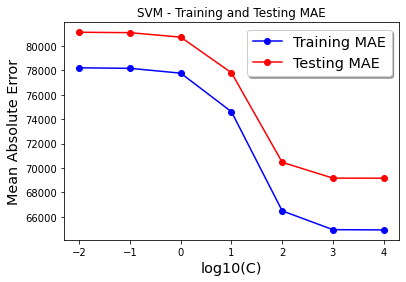

In [63]:
#draw the training and testing MAE
drawTrainingAndTestingMAE(C_range, train_mae, test_mae, "SVM - Training and Testing MAE")

In [64]:
#Select the best SVM model and re-train the model
svm_reg_best = gs_reg.best_estimator_
svm_reg_best.fit(X_train, y_train)

print('Training MAE:', mean_absolute_error(svm_reg_best.predict(X_train), y_train))
print('Test MAE:', mean_absolute_error(svm_reg_best.predict(X_test), y_test))

Training MAE: 66482.825350341
Test MAE: 70465.44712290971


### Regression Model 2- K-Nearest Neighbours (KNN) /GridSearchCV Approach

In [65]:
# Model 2
# Enter your code here:
knn_reg = neighbors.KNeighborsRegressor()


#define parameters
param_grid = {'n_neighbors' : [3,5,7,9,15, 25], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['euclidean','manhattan'] }



#GridSearch approach used to select the best hyperparameters. 
# cv: No of partitions for Cross Validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors.
gs_reg = GridSearchCV(knn_reg, param_grid=param_grid, scoring='accuracy', cv= 7, n_jobs=-1)


gs_reg.fit(X_train, y_train) 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=7, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 15, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsRegressor(metric='euclidean', n_neighbors=3)


In [67]:
#calculate training and testing accuracy for different neighbour range
neighbor_range = range(4, 26)
train_mae = []
test_mae = []

for n in neighbor_range:
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=n, weights='uniform', metric= 'euclidean')
    knn_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error( knn_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error( knn_reg.predict(X_test), y_test))

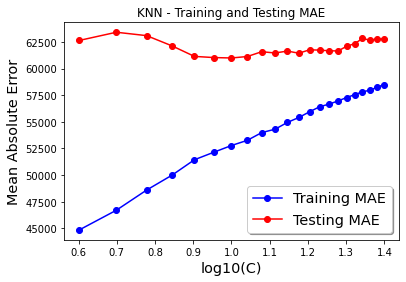

In [68]:
#draw the training and testing MAE
drawTrainingAndTestingMAE(neighbor_range, train_mae, test_mae, "KNN - Training and Testing MAE")

In [69]:
#Select the best KNN model and re-train the model
knn_reg_best = gs_reg.best_estimator_
knn_reg_best.fit(X_train, y_train)

print('KNN Training MAE:', mean_absolute_error(knn_reg_best.predict(X_train), y_train))
print('KNN Test MAE:', mean_absolute_error(knn_reg_best.predict(X_test), y_test))

KNN Training MAE: 40970.747114330676
KNN Test MAE: 61555.73767657787


### Regression Model 3 - Decision Tree /Bagging Regressor

In [70]:
# Model 3
# Enter your code here:
param_grid = {"n_estimators" : [10,100,1000] , 
              'max_depth' : [3,9,27]}


#gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)

#gs_reg.fit(X_train, y_train)


dTree_reg = tree.DecisionTreeRegressor()

gs_reg = ensemble.BaggingRegressor(
    dTree_reg,
    n_estimators = 100, #number of estimator can be used
    max_samples = 350, # no of samples for each training 
    bootstrap=True, #  bootstrap sampling enabled.
    n_jobs=-1) # use all cores 

gs_reg.fit(X_train, y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=350,
                 n_estimators=100, n_jobs=-1)

In [71]:
print(gs_reg.get_params)
print(gs_reg.base_estimator_)

<bound method BaseEstimator.get_params of BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=350,
                 n_estimators=100, n_jobs=-1)>
DecisionTreeRegressor()


In [72]:
#Select the best Decision Tree model and re-train the model
dtree_reg_best = gs_reg.base_estimator_
dtree_reg_best.fit(X_train, y_train)

print('Decision Tree Training MAE:', mean_absolute_error(dtree_reg_best.predict(X_train), y_train))
print('Decision Tree Test MAE:', mean_absolute_error(dtree_reg_best.predict(X_test), y_test))

Decision Tree Training MAE: 32.86852589641434
Decision Tree Test MAE: 66544.32553578132


#### Regression Model 4 - Random Forest Regression

In [73]:
# Model 4
# Enter your code here:

#Random Forest Regression

depth_range = range(1,25)
train_mae = []
test_mae = []

for d in depth_range:
    rf_reg = ensemble.RandomForestRegressor(n_estimators =30, 
                                             criterion ='mse', 
                                             max_depth = d)
    rf_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(rf_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(rf_reg.predict(X_test), y_test))

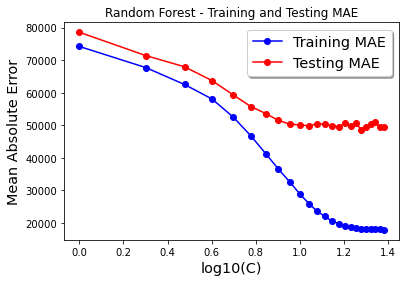

In [74]:
#draw the training and testing MAE
drawTrainingAndTestingMAE(depth_range, train_mae, test_mae, "Random Forest - Training and Testing MAE")

In [75]:
1+ np.argmin(test_mae)

19

In [76]:
#Select the best Random Forest model and re-train the model
rf_reg_best =  rf_reg = ensemble.RandomForestRegressor(n_estimators =30, 
                                             criterion ='mse', 
                                             max_depth = 19)
rf_reg_best.fit(X_train, y_train)

print('Random Forest Training MAE:', mean_absolute_error(rf_reg_best.predict(X_train), y_train))
print('Random Forest Test MAE:', mean_absolute_error(rf_reg_best.predict(X_test), y_test))

Random Forest Training MAE: 18565.172043419858
Random Forest Test MAE: 50977.52969024258


#### Regression Model 5 - Boosting Regressor

In [77]:
# Model 5
# Enter your code here:

#Extreme gradient Boosting Regressor 
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
print('Extreme gradient Boosting Regressor - Training MAE:', mean_absolute_error(xgb_reg.predict(X_train), y_train))
print('Extreme gradient Boosting Regressor - Test MAE:', mean_absolute_error(xgb_reg.predict(X_test), y_test))

Extreme gradient Boosting Regressor - Training MAE: 9109.893989186752
Extreme gradient Boosting Regressor - Test MAE: 46842.008120429426


### Step 3: Recommend the Best Model and Explain the Reasons

Enter your answer here:



<AxesSubplot:title={'center':'Train & Test MAE for different Regression models'}>

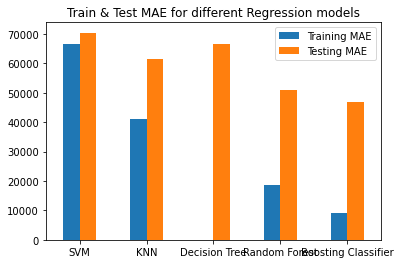

In [79]:
train_mae = [mean_absolute_error(svm_reg_best.predict(X_train), y_train),
                mean_absolute_error(knn_reg_best.predict(X_train), y_train),
                mean_absolute_error(dtree_reg_best.predict(X_train), y_train),
                mean_absolute_error(rf_reg_best.predict(X_train), y_train),
                mean_absolute_error(xgb_reg.predict(X_train), y_train)
                ]


test_mae =[
     mean_absolute_error(svm_reg_best.predict(X_test), y_test),
 mean_absolute_error(knn_reg_best.predict(X_test), y_test),
 mean_absolute_error(dtree_reg_best.predict(X_test), y_test),
 mean_absolute_error(rf_reg_best.predict(X_test), y_test),
 mean_absolute_error(xgb_reg.predict(X_test), y_test)
]
label =['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Boosting Classifier']

df_acc = pd.DataFrame({'Training MAE': train_mae,
                   'Testing MAE': test_mae}, index=label)

df_acc.plot.bar(rot=0, title ='Train & Test MAE for different Regression models')

In [80]:
# Enter your code here (if required):
np.argmin(test_mae)

# Index 4 refers Extreme Boosting algorithm 

4

Recommendation 
===============
#### There are five regression algorithms, namely "SVM", "KNN", "Decision Tree", "Random Forest" and "Extreme Boosting " used for the comparison. Eventually, Extreme Gradient Boosting (XGBoost) based trained model has contributed few errors.
#### So SVM based model has been selected as a best regressor for the given house price dataset.


### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. 95% confidence interval, visualization tools and etc.)

#### 4.1 Mean Absolute Error

In [81]:
# Enter your code here:
y_pred = xgb_reg.predict(X_test)
print('Extreme gradient Boosting Regressor - Training MAE:', mean_absolute_error(xgb_reg.predict(X_train), y_train))
print('Extreme gradient Boosting Regressor - Test MAE:', mean_absolute_error(xgb_reg.predict(X_test), y_test))

Extreme gradient Boosting Regressor - Training MAE: 9109.893989186752
Extreme gradient Boosting Regressor - Test MAE: 46842.008120429426


#### 4.2 Mean Squared Error

In [82]:
print('Extreme gradient Boosting Regressor - Training MSE:', mean_squared_error(xgb_reg.predict(X_train), y_train))
print('Extreme gradient Boosting Regressor - Test MSE:', mean_squared_error(xgb_reg.predict(X_test), y_test))

Extreme gradient Boosting Regressor - Training MSE: 158800248.81125134
Extreme gradient Boosting Regressor - Test MSE: 4069616951.6087933


#### 4.3 Visualize Y-Test and Y-Prediction

No handles with labels found to put in legend.


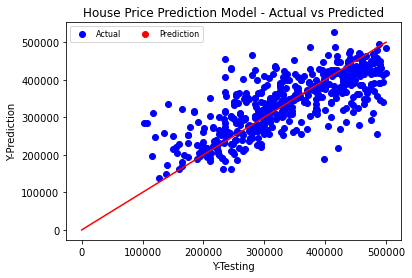

In [83]:
# Visualize y_test & y_pred
colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(y_test.values[0],y_test.values[0], marker='o', color='b')
ll = plt.scatter(y_pred[0], y_pred[0], marker='o', color='r')

plt.scatter(y_test, y_pred, color='b')
plt.plot([0, 500000], [0,500000], 'r-')
plt.title("House Price Prediction Model - Actual vs Predicted")
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.xlabel('Y-Testing')
plt.ylabel('Y-Prediction')


plt.legend((lo, ll),
           ('Actual', 'Prediction'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)


#### 4.4 Regression with Error Bars

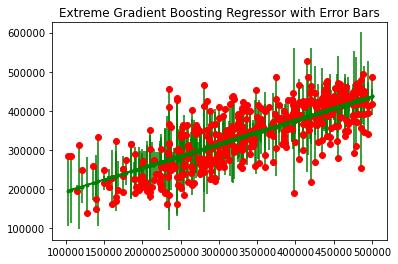

In [84]:
#import matplotlib.pyplot as plt
#import numpy as np


coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients

plt.plot(y_test, y_pred, 'ro', y_test, poly1d_fn(y_test), '-g')
plt.errorbar(y_test, poly1d_fn(y_test), yerr=poly1d_fn(y_test) - y_pred, fmt='.g', )
plt.title('Extreme Gradient Boosting Regressor with Error Bars')
plt.show()

### Step 5: Save the Best Model for Future Use

In [85]:
# Enter your code here:

joblib.dump(xgb_reg, "best_regression_model.pkl")

['best_regression_model.pkl']

 
 
## <center>End of Assignment<center>
---